In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardataset/data.csv
/kaggle/input/bismillahskripsi/Buleleng-Climate - Full (1).csv


# **Linear Regression:**

Linear regression is a statistical method used to analyze the relationship between a dependent variable and one or more independent variables. In linear regression, the relationship between the variables is modeled using a linear equation. This equation can be used to predict the value of the dependent variable based on the values of the independent variables.

There are several types of linear regression, including simple linear regression, multiple linear regression, and polynomial regression.

* **Simple linear regression:** This type of linear regression models the relationship between a dependent variable and a single independent variable. It is used to identify the strength of the relationship between the two variables and to predict the value of the dependent variable based on the value of the independent variable.

* **Multiple linear regression:** This type of linear regression models the relationship between a dependent variable and two or more independent variables. It is used to identify the strength of the relationship between the variables and to predict the value of the dependent variable based on the values of the independent variables.

* **Polynomial regression:** This type of linear regression is used to model relationships between the dependent and independent variables that are not linear. It can be used to fit a curve to the data and make predictions based on the curve.

You can find my project about simple linear regression [here](http://www.kaggle.com/code/emineyetm/simple-linear-regression-using-python).

*Multiple regression* is a statistical method used to model the relationship between multiple independent variables and a dependent variable. In Python, this can be performed using the sklearn library. To use multiple regression with this library, you will first need to create a LinearRegression object, then train the model on your data using the fit() method. Once the model is trained, you can use the predict() method to make predictions on new data.

* Here : Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + …… bn * xn 
* Y = Dependent variable and x1, x2, x3, …… xn = multiple independent variables 

**Assumption of Regression Model :** 
* Linearity: The relationship between dependent and independent variables should be linear.
* Homoscedasticity: Constant variance of the errors should be maintained.
* Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
* Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
# Reading the Dataset
df = pd.read_csv("/kaggle/input/bismillahskripsi/Buleleng-Climate - Full (1).csv")

In [4]:
df.head()

,Year,Periode,Produktivitas Mangga,Produktivitas Jeruk,Max,Min,Tavg,Sun Hour,Sun Day,Curah Hujan,Hari Hujan,Kecepatan A,Mx Kec
0,2012,Triwulan I,0.46,0.17,28.0,25.0,26.00,78.7,8,501,83,8.17,13.4
1,2012,Triwulan II,0.00,0.10,28.0,24.0,26.00,237.7,49,164,42,8.93,14.0
2,2012,Triwulan III,0.27,0.20,28.0,22.0,24.33,336.3,88,10,4,12.20,17.2
3,2012,Triwulan IV,0.46,0.11,29.0,25.0,27.00,176.0,24,375,68,7.93,13.6
4,2013,Triwulan I,0.65,0.16,28.0,25.0,27.00,140.7,20,338,70,7.33,12.0


In [5]:
df.shape

(40, 13)

In [6]:
print(df.corr())

                          Year  Produktivitas Mangga  Produktivitas Jeruk  \
Year                  1.000000              0.010064            -0.070046   
Produktivitas Mangga  0.010064              1.000000             0.228743   
Produktivitas Jeruk  -0.070046              0.228743             1.000000   
Max                   0.279426              0.235977             0.245804   
Min                  -0.088834              0.194542             0.137681   
Tavg                 -0.066674              0.147447             0.186269   
Sun Hour             -0.268175             -0.028627             0.141859   
Sun Day               0.030909             -0.111666             0.008470   
Curah Hujan           0.204291             -0.173016            -0.136795   
Hari Hujan            0.254543             -0.165654            -0.109886   
Kecepatan A          -0.603841             -0.001481             0.053439   
Mx Kec               -0.687437              0.011073             0.062386   

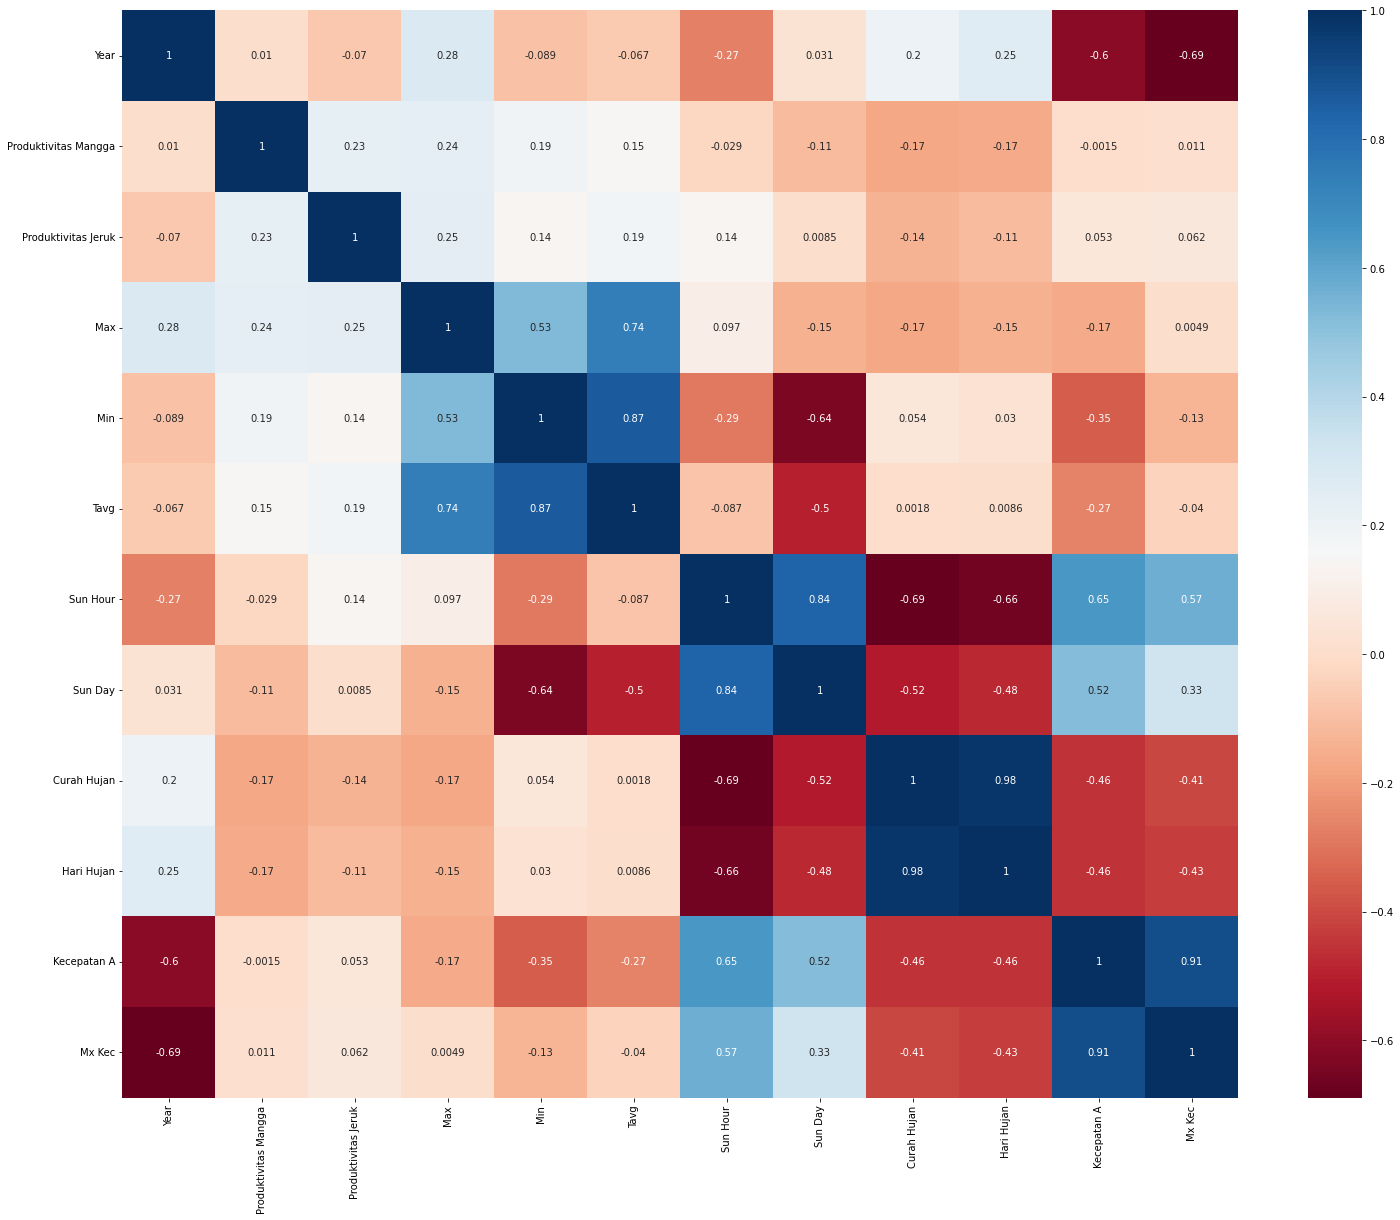

In [7]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

In [8]:
print(df.describe())

              Year  Produktivitas Mangga  Produktivitas Jeruk        Max  \
count    40.000000               40.0000            40.000000  40.000000   
mean   2016.500000                0.4385             0.188500  29.175000   
std       2.908872                0.2978             0.174922   0.930605   
min    2012.000000                0.0000             0.000000  28.000000   
25%    2014.000000                0.2550             0.100000  28.000000   
50%    2016.500000                0.4900             0.160000  29.000000   
75%    2019.000000                0.5900             0.242500  30.000000   
max    2021.000000                1.3700             0.850000  31.000000   

             Min       Tavg    Sun Hour   Sun Day  Curah Hujan  Hari Hujan  \
count  40.000000  40.000000   40.000000  40.00000    40.000000   40.000000   
mean   24.700000  26.683500  191.615000  40.05000   296.975000   63.725000   
std     0.992278   1.010064   78.482399  25.66645   345.464421   67.614665   
min

**Then make a list of the independent values and call this variable X. Put the dependent values in a variable called y.**

It is common to name the list of independent values with an uppercase X and the list of dependent values with a lowercase y.
* **Equation:** Sales = β0 + (β1 * Curah Hujan) + (β2 * Tavg) + (β3 * Sun Hour) + (β4 * CUrah Hujan) + e
* Setting the values for independent **(X)** variable and dependent **(Y)** variable

**Checking for outliers**

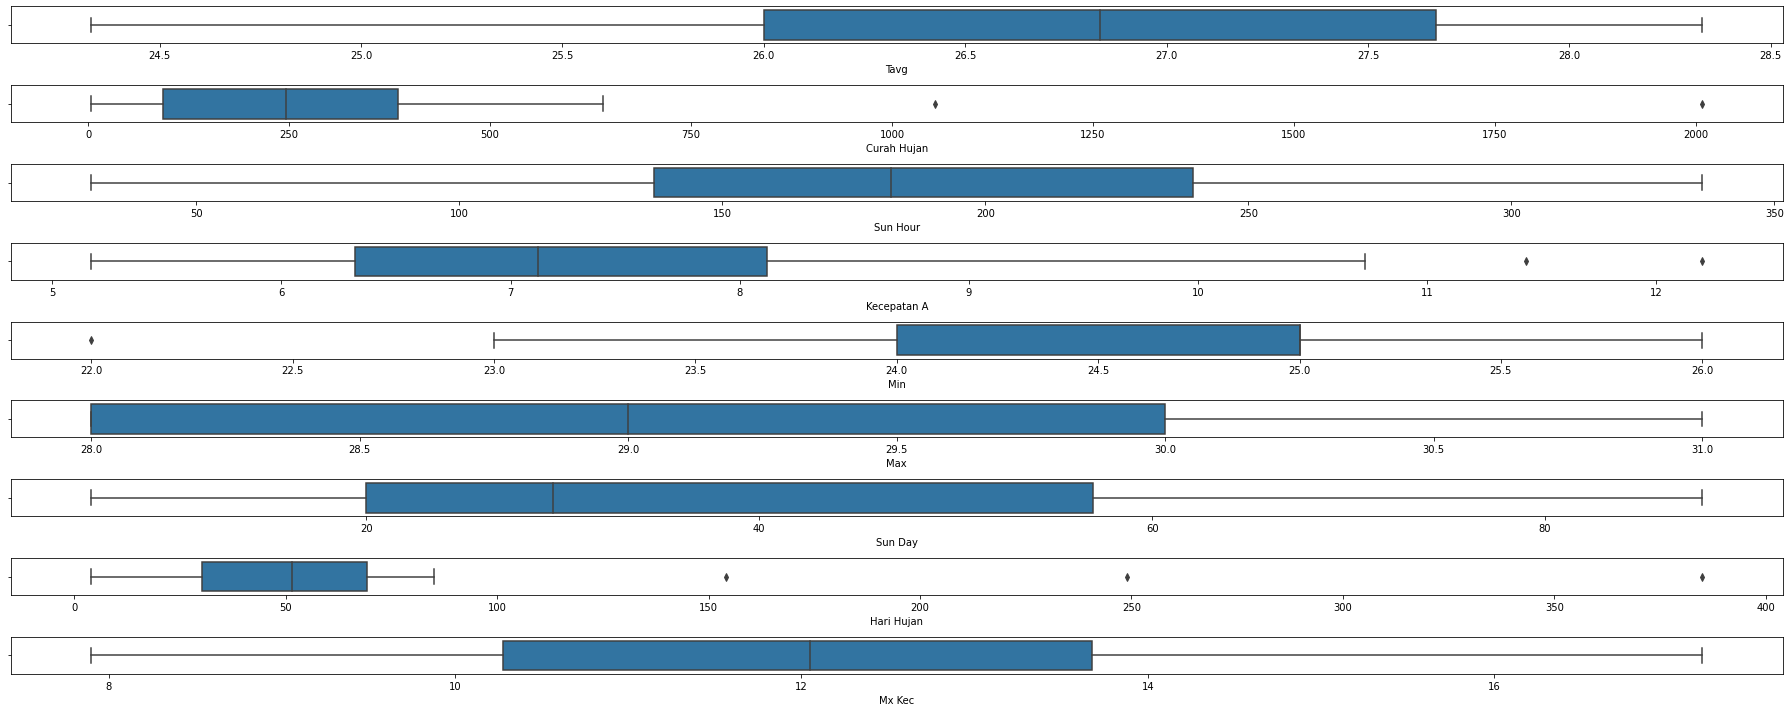

In [9]:
fig, axs = plt.subplots(9, figsize = (25,10))
plt1 = sns.boxplot(df['Tavg'], ax = axs[0])
plt2 = sns.boxplot(df['Curah Hujan'], ax = axs[1])
plt3 = sns.boxplot(df['Sun Hour'], ax = axs[2])
plt4 = sns.boxplot(df['Kecepatan A'], ax = axs[3])
plt5 = sns.boxplot(df['Min'], ax = axs[4])
plt6 = sns.boxplot(df['Max'], ax = axs[5])
plt7 = sns.boxplot(df['Sun Day'], ax = axs[6])
plt8 = sns.boxplot(df['Hari Hujan'], ax = axs[7])
plt9 = sns.boxplot(df['Mx Kec'], ax = axs[8])
plt.tight_layout()

In [10]:
def outlier_detection(dataframe):
  Q1 = dataframe.quantile(0.25)
  Q3 = dataframe.quantile(0.75)
  IQR = Q3 - Q1
  upper_end = Q3 + 1.5 * IQR
  lower_end = Q1 - 1.5 * IQR 
  outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
  return outlier

In [11]:
outlier_detection(df['Curah Hujan'])

32    2008
35    1053
Name: Curah Hujan, dtype: int64

In [12]:
outlier_detection(df['Kecepatan A'])

2    12.20
6    11.43
Name: Kecepatan A, dtype: float64

In [13]:
outlier_detection(df['Min'])

2    22.0
Name: Min, dtype: float64

In [14]:
outlier_detection(df['Hari Hujan'])

32    385
33    154
35    249
Name: Hari Hujan, dtype: int64

In [15]:
df1 = df.drop([2, 6, 10, 32, 33, 35])
df1.shape

(34, 13)

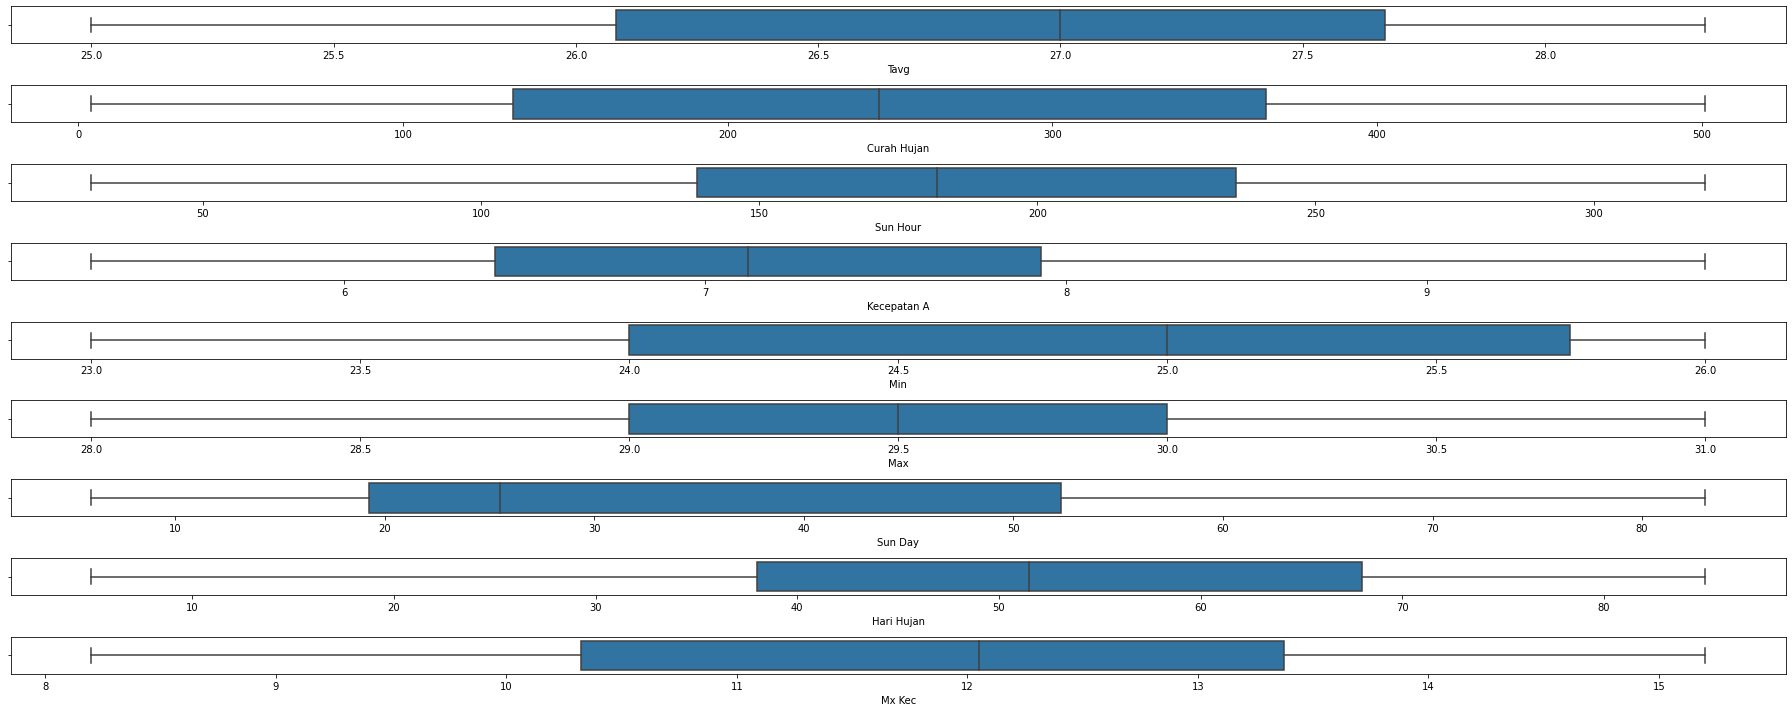

In [16]:
fig, axs = plt.subplots(9, figsize = (25,10))
plt1 = sns.boxplot(df1['Tavg'], ax = axs[0])
plt2 = sns.boxplot(df1['Curah Hujan'], ax = axs[1])
plt3 = sns.boxplot(df1['Sun Hour'], ax = axs[2])
plt4 = sns.boxplot(df1['Kecepatan A'], ax = axs[3])
plt5 = sns.boxplot(df1['Min'], ax = axs[4])
plt6 = sns.boxplot(df1['Max'], ax = axs[5])
plt7 = sns.boxplot(df1['Sun Day'], ax = axs[6])
plt8 = sns.boxplot(df1['Hari Hujan'], ax = axs[7])
plt9 = sns.boxplot(df1['Mx Kec'], ax = axs[8])
plt.tight_layout()

In [17]:
#Setting the value for X and Y
X = df1[['Min', 'Max', 'Tavg', 'Sun Day', 'Sun Hour','Curah Hujan', 'Hari Hujan', 'Kecepatan A', 'Mx Kec']]
y = df1['Produktivitas Jeruk']

# Exploratory Data Analysis

**Distribution of the target variable**

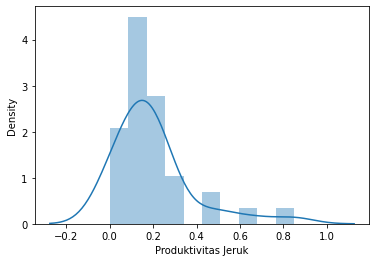

In [18]:
sns.distplot(df1['Produktivitas Jeruk']);

**Conclusion:** It is normally not normal distributed, but symmetrical

**Relationship of Mangga with other variables**

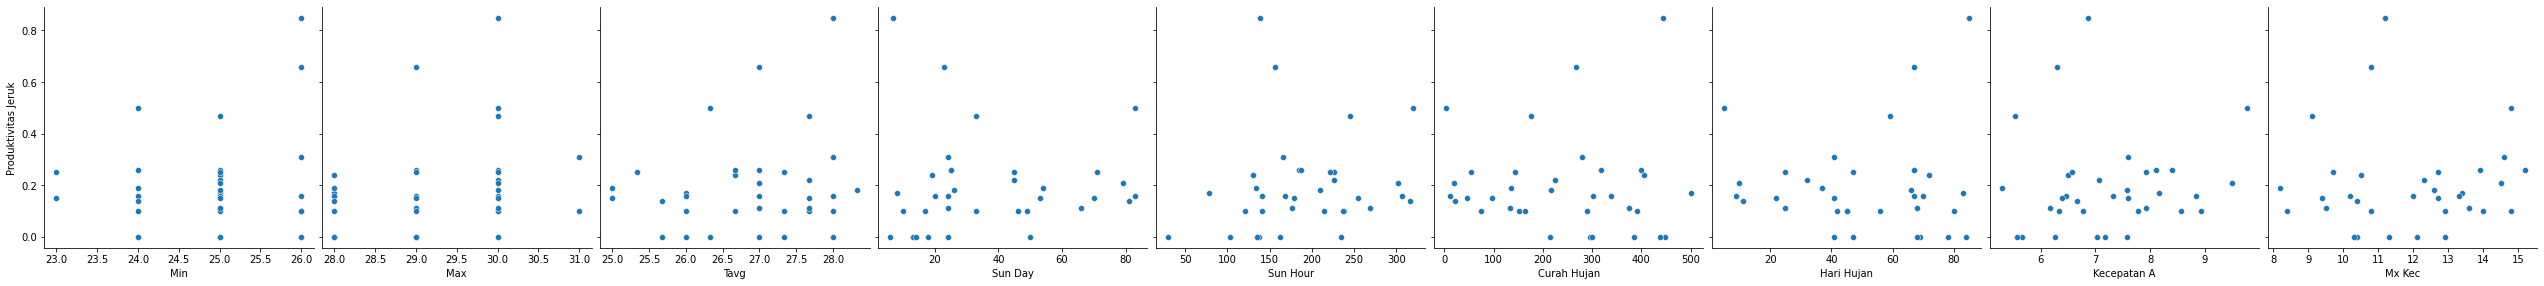

In [19]:
sns.pairplot(df1, x_vars=['Min', 'Max', 'Tavg', 'Sun Day', 'Sun Hour','Curah Hujan', 'Hari Hujan', 'Kecepatan A', 'Mx Kec'], y_vars='Produktivitas Jeruk', height=4, aspect=1, kind='scatter')
plt.show()

**Heatmap**
The sns.heatmap() function creates a visualization that shows the correlation matrix of a dataset as a heatmap. The annot parameter of this function shows or does not show correlation values in the cells of the heatmap. If this parameter is set to True, correlation values in cells are displayed.

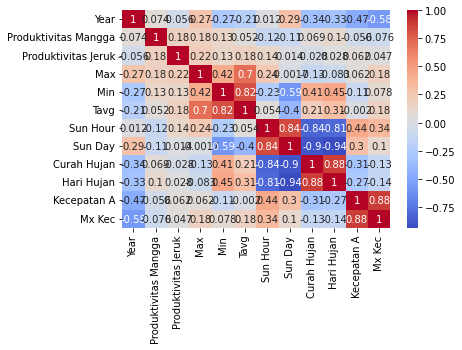

In [20]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

# Model Building

**Splitting the dataset into train and test set**

We need to split our dataset into training and testing sets. We’ll perform this by importing train_test_split from sklearn.model_selection library. It is usually good to keep 70% of the data in your train dataset and the rest 30% in your test dataset.

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [22]:
y_train.shape

(23,)

In [23]:
y_test.shape

(11,)

In [24]:
reg_model = linear_model.LinearRegression()

In [25]:
#Fitting the Multiple Linear Regression model
reg_model = LinearRegression().fit(X_train, y_train)

In [26]:
#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  -2.5849554749558354


[('Min', 0.007605413100919787),
 ('Max', 0.1956432560734231),
 ('Tavg', -0.14625429844912663),
 ('Sun Day', -0.003548562699576492),
 ('Sun Hour', 0.0032144649486832155),
 ('Curah Hujan', 0.0013139013259405585),
 ('Hari Hujan', 0.002487110498619133),
 ('Kecepatan A', 0.19110961060403606),
 ('Mx Kec', -0.12596500532724408)]

In [27]:
from scipy import stats
import matplotlib.pyplot as plt

In [28]:
statistic, pvalue = stats.shapiro(X_train)

print("Shapiro-Wilk test statistic:", statistic)
print("Shapiro-Wilk test p-value:", pvalue)

Shapiro-Wilk test statistic: 0.6466799974441528
Shapiro-Wilk test p-value: 1.6709049989158293e-20


In [29]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [30]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 0.73806576  0.41955978  0.14330024  0.26607933  0.1262098   0.34355839
  0.17043123 -0.09193871  0.25624129  0.09280774  0.11974367]


In [31]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
28,0.10,0.738066
39,0.00,0.419560
36,0.00,0.143300
7,0.26,0.266079
1,0.10,0.126210
16,0.00,0.343558
21,0.22,0.170431
37,0.19,-0.091939
22,0.21,0.256241
8,0.00,0.092808


In [32]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.23523510428287053
Mean Square Error: 0.10063859041769688
Root Mean Square Error: 0.31723585928721376
